<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом практическом задании можно попрактиковаться в использовании библиотек и в реальном прогнозе нейросетью глубокого обучения. 

# Предсказание цен на авокадо нейросетью

## Загрузка данных

In [80]:
import os
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn

Датасет из kaggle https://www.kaggle.com/datasets/neuromusic/avocado-prices

Из него мы будем использовать только 

> **Date** - дата

> **AveragePrice** - цена





In [81]:
dat = pd.read_csv('avocado.csv')

In [82]:
dat

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,11,2018-01-07,0.85,303963.18,167628.98,10026.09,409.67,125898.44,108075.96,16240.96,1581.52,conventional,2018.0,Nashville
8802,0,2018-03-25,1.04,305105.53,171335.77,20076.04,2425.10,111268.62,94895.33,15963.29,410.00,conventional,2018.0,NewOrleansMobile
8803,1,2018-03-18,1.02,316969.55,181011.25,19002.68,2515.00,114440.62,95470.29,18533.66,436.67,conventional,2018.0,NewOrleansMobile
8804,2,2018-03-11,1.05,316463.18,177320.17,22478.10,2158.00,114506.91,93807.58,20352.66,346.67,conventional,2018.0,NewOrleansMobile


информация дана по разным городам, посмотрим на график

<Figure size 1152x360 with 0 Axes>

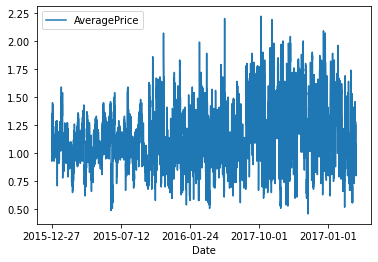

In [7]:
plt.figure(figsize=(16, 5))
df.plot(x="Date", y="AveragePrice")
# plt.title("P_2", fontsize=16)
# plt.xlabel("S_2", fontsize=14)
# plt.ylabel("P_2", fontsize=14);

заполним пропуски

In [42]:
dat.fillna(0)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,11,2018-01-07,0.85,303963.18,167628.98,10026.09,409.67,125898.44,108075.96,16240.96,1581.52,conventional,2018.0,Nashville
8802,0,2018-03-25,1.04,305105.53,171335.77,20076.04,2425.10,111268.62,94895.33,15963.29,410.00,conventional,2018.0,NewOrleansMobile
8803,1,2018-03-18,1.02,316969.55,181011.25,19002.68,2515.00,114440.62,95470.29,18533.66,436.67,conventional,2018.0,NewOrleansMobile
8804,2,2018-03-11,1.05,316463.18,177320.17,22478.10,2158.00,114506.91,93807.58,20352.66,346.67,conventional,2018.0,NewOrleansMobile


будем прогнощировать цены в Нью Йорке

In [18]:
data = df.loc[df["region"] == 'NewYork']

In [19]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1456,0,2015-12-27,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,2015.0,NewYork
1457,1,2015-12-20,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,2015.0,NewYork
1458,2,2015-12-13,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,2015.0,NewYork
1459,3,2015-12-06,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,2015.0,NewYork
1460,4,2015-11-29,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,2015.0,NewYork
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7148,48,2017-01-29,1.52,1270564.47,17844.88,816423.62,94445.56,341850.41,285574.23,51331.29,4944.89,conventional,2017.0,NewYork
7149,49,2017-01-22,1.48,1721917.04,15652.26,1169600.51,206537.54,330126.73,288384.55,36337.65,5404.53,conventional,2017.0,NewYork
7150,50,2017-01-15,1.38,1384264.04,14301.61,995747.96,58355.49,315858.98,275101.56,38860.92,1896.50,conventional,2017.0,NewYork
7151,51,2017-01-08,1.29,1532074.69,18585.10,1207607.23,6403.22,299479.14,258470.17,40822.02,186.95,conventional,2017.0,NewYork


Визуализируем эти значения

<Figure size 1152x360 with 0 Axes>

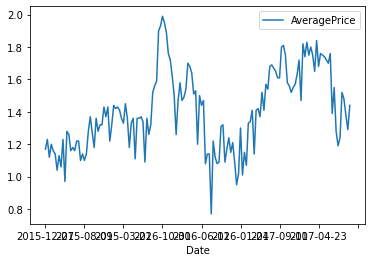

In [20]:
plt.figure(figsize=(16, 5))
data.plot(x="Date", y="AveragePrice")

In [84]:
fig = px.scatter(data, x="Date", y="AveragePrice")
fig.show()

## Подготовка данных для модели

In [48]:
all_data = data["AveragePrice"].values.astype(float)

In [49]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [50]:
print(len(train_data))
print(len(test_data))

145
12


Нормализация данных

In [52]:
scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [54]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [55]:
train_window = 12

Здесь созддаём функция для преобразования данных по 12 месяцев

In [56]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [57]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [58]:
train_inout_seq[:5]

[(tensor([-0.3443, -0.2459, -0.4262, -0.2951, -0.3607, -0.3934, -0.5574, -0.4098,
          -0.5246, -0.2459, -0.6721, -0.1639]), tensor([-0.1967])),
 (tensor([-0.2459, -0.4262, -0.2951, -0.3607, -0.3934, -0.5574, -0.4098, -0.5246,
          -0.2459, -0.6721, -0.1639, -0.1967]),
  tensor([-0.3607])),
 (tensor([-0.4262, -0.2951, -0.3607, -0.3934, -0.5574, -0.4098, -0.5246, -0.2459,
          -0.6721, -0.1639, -0.1967, -0.3607]), tensor([-0.3279])),
 (tensor([-0.2951, -0.3607, -0.3934, -0.5574, -0.4098, -0.5246, -0.2459, -0.6721,
          -0.1639, -0.1967, -0.3607, -0.3279]), tensor([-0.3607])),
 (tensor([-0.3607, -0.3934, -0.5574, -0.4098, -0.5246, -0.2459, -0.6721, -0.1639,
          -0.1967, -0.3607, -0.3279, -0.3607]), tensor([-0.2623]))]

## Создание модели

Это нейронная сеть, пробую почти впервый раз в PyTorch. 

Для её создания я использовала несколько обучающих сайтов

Deep learning - особые нейросети, которые обычно занимаются работой с преобразованием данных. Разпознаванием какой-либо информации. Звука, изображения.

Реккурентные нейросети - нейросети, которые занимаются последователностями. Они, кроме распознания речи, способны на прогнозирование. Именно прогноз требует последовательного мышления.

LSTM - Long Short Time Memory

Моя любимая нейросеть глубокого обучения)

Используется очень часто для временных рядов в эконометрике.

In [59]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

loss func в данной регрессии MSE, optimizer по традициям Adam

In [60]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

В PyTorch нужно почти самим реализовывать процесс обучения. В этом могли возникнуть проблемы. Но если познакомися с теорией, ничего сложного.

In [61]:
epochs = 150

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00877108
epoch:  26 loss: 0.00009720
epoch:  51 loss: 0.00002402
epoch:  76 loss: 0.00011062
epoch: 101 loss: 0.00019772
epoch: 126 loss: 0.00001969
epoch: 149 loss: 0.0000387297


Чесно говоря, я сначала подумала о переобучении. Получились очень маленькие значения ошибки. Посмотрим на редсказания

## Прогноз

In [62]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.5901639461517334, 0.7377049326896667, 0.6065573692321777, 0.688524603843689, 0.6065573692321777, 0.44262295961380005, 0.7540983557701111, 0.49180328845977783, 0.6229507923126221, 0.6065573692321777, 0.5901639461517334, 0.5573770403862]


In [64]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [70]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[1.72636417]
 [1.66806796]
 [1.74409692]
 [1.43764478]
 [1.71574318]
 [1.5048645 ]
 [1.64603976]
 [1.62437583]
 [1.72371754]
 [1.6820647 ]
 [1.54958914]
 [1.63301839]
 [1.41731633]
 [1.60272147]
 [1.54627156]
 [1.62729637]
 [1.40828156]
 [1.21827018]
 [1.2614721 ]
 [1.04008399]
 [1.02800392]
 [1.19554955]
 [0.92706852]
 [0.7386272 ]]


Самое интересное - визуализировать . Направления в первые месяца модель хорошо предсказывает)

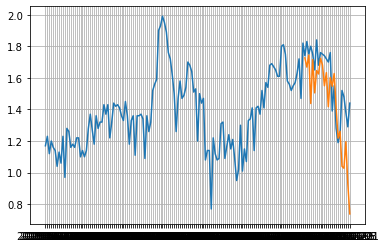

In [83]:
plt.grid(True)

plt.plot(data["Date"], data["AveragePrice"])
plt.plot(list(data["Date"])[-24:],actual_predictions)
plt.show()
